In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.metrics import mean_squared_error

Get benchmark performance

In [62]:
df = pd.read_csv('data/data_arima.csv', index_col=1)[['mood', 'benchmark']] ## todo change: do data that RF uses
df = df[~df.mood.isna() & ~df.benchmark.isna()] ## todo: remove after using data that RF uses
benchmark = df.groupby('id').apply(lambda x: mean_squared_error(x['mood'], x['benchmark'])).to_frame('mse')
benchmark

,mse
id,
AS14.01,0.320932
AS14.02,0.940653
AS14.03,0.183846
AS14.05,0.543088
AS14.06,0.576570
AS14.07,2.344444
AS14.08,0.406184
AS14.09,0.620049
AS14.12,0.463077


Compare the results from:
- Random forest
- Arima
- LSTM
- Benchmark

In [77]:
arima = pd.read_csv('results/arima_final.csv',index_col=0)
arima.index.rename('id', inplace=True)
#rf = 
#lstm = 

print(f'Mean MSE of arima is \t\t{arima["mse"].mean()} with std of ')
print(f'Mean/std MSE of benchmark is \t{benchmark["mse"].mean()}')
print(f'Std of MSE of benchmark is \t{benchmark["mse"].std()}')

Mean MSE of arima is 		0.30789154208311365
Std of MSE of arima is 		0.2923561063440708

Mean MSE of benchmark is 	0.574287111192899
Std of MSE of benchmark is 	0.4308188003510414


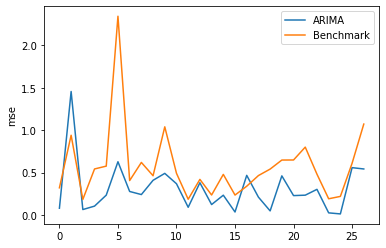

In [71]:
amt_persons = len(benchmark)
sns.lineplot(x=range(0, amt_persons), y= arima['mse'], label="ARIMA")
sns.lineplot(x=range(0, amt_persons), y= benchmark['mse'], label="Benchmark")

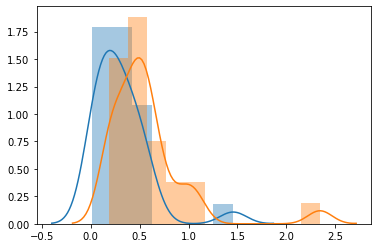

In [73]:
sns.distplot(arima)
sns.distplot(benchmark)